# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [3]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [4]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [5]:
sample_df["column 2"].loc[sample_df["column 1"] == 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [23]:
# You will need to import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl # We'll use the matplotlib.colors library to color our data points
%matplotlib inline 

In [11]:
df=pd.read_csv("oh_table.csv")
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [33]:
myG=df["G"].loc[df["group_id"] == 1]
myDistance=df["distance"].loc[df["group_id"] == 1]
myJ=df["J"].loc[df["group_id"] == 1]
print(myG)
print(myDistance)
print(myJ)

151    10.276
152     7.372
153     7.930
154     8.823
155    10.054
156     7.566
157    11.489
158     6.423
159     8.822
160     8.540
161     9.372
162     8.470
163    10.210
164     6.186
165     8.532
166     8.903
167     8.166
168     9.598
169     9.913
170     9.140
171     6.918
172     7.084
173     8.552
174     7.602
175    10.974
176    11.511
177    11.820
178    10.480
179    11.278
180     9.705
        ...  
246     7.891
247     6.106
248     8.157
249     8.403
250    11.097
251    10.111
252     9.047
253     8.409
254     8.582
255     9.089
256     6.963
257    10.474
258     8.100
259     8.903
260     9.081
261     8.953
262    10.672
263     9.904
264    11.047
265     9.747
266    10.037
267    10.105
268     8.014
269     7.070
270     7.871
271     7.195
272     7.299
273     9.076
274     6.899
275     7.633
Name: G, Length: 125, dtype: float64
151    155.458
152    140.343
153    162.826
154    146.798
155    154.674
156    137.214
157    147.702
158 

In [44]:
# You can use this function in your code to find the log of distanceprint
log_distance = np.log10(myDistance)
absolute_magnitude = myG - 5 * log_distance + 5
print(absolute_magnitude.head())
# np.log10()

151    4.317935
152    1.636046
153    1.871381
154    2.989399
155    4.106913
dtype: float64


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

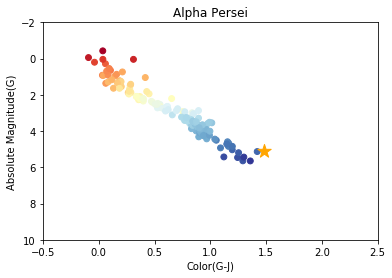

In [31]:
cm = plt.cm.get_cmap("RdYlBu")
plt.scatter(myG-myJ, absolute_magnitude,c=myG, s=35, cmap=cm, norm=mpl.LogNorm())
plt.scatter(5.12-3.64,5.12, c='orange', s=200, marker='*')
plt.title('Alpha Persei')
plt.xlabel('Color(G-J)')
plt.ylabel('Absolute Magnitude(G)')
plt.xlim(-0.5, 2.5)
plt.ylim(-2, 10)
plt.gca().invert_yaxis()
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

In [22]:
color = myG-myJ

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

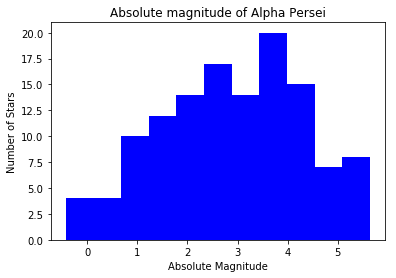

In [28]:
plt.hist(absolute_magnitude,bins= 11,color="blue")
plt.title("Absolute magnitude of Alpha Persei")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Number of Stars")

plt.show()

/Users/student/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/student/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


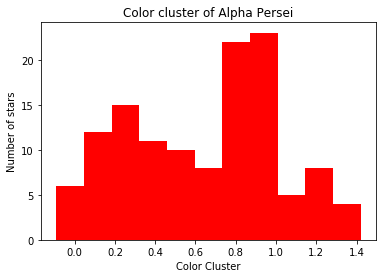

In [29]:
plt.hist(color, bins = 11, range=(color.min(), color.max()), color ='red')
plt.title("Color cluster of Alpha Persei")
plt.xlabel("Color Cluster")
plt.ylabel("Number of stars")
plt.show()